## Support Vector Regressor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[-0.00310282,  0.63399234],
       [-0.58223027,  0.35623979],
       [ 0.94462669, -0.69665528],
       ...,
       [-0.49404338, -1.74701985],
       [-0.23192181, -0.56534874],
       [-0.46160241,  0.30934374]])

In [6]:
y

array([ 3.35384386e+01,  3.91229053e+00, -1.28975592e+01,  7.66103340e+01,
       -2.64133854e+01,  5.92874359e+01, -1.86651041e+01,  1.18282793e+02,
        1.80540775e+02,  1.07029949e+01,  2.61107741e+01,  2.56864377e+01,
       -1.07055000e+01, -8.85489480e+01, -3.68598631e+01,  4.61552771e+01,
        2.72385033e+01, -4.34881251e+01,  4.94441449e+01, -1.37055094e+02,
       -1.89564342e+01, -4.62257722e+01, -3.73915315e+01, -2.04022522e+00,
       -1.33455812e+01, -9.93251702e+01, -1.44177249e+01,  3.55352719e+01,
        3.39134152e+01,  9.33993413e+01,  4.34313841e+01,  4.93510777e+00,
        3.30767076e+01, -1.50614032e+01, -8.32792299e+01,  3.12934190e+01,
       -5.73280803e+01, -4.18143321e+01, -9.40890964e+00, -1.62329117e+01,
        2.65719689e+01,  3.05100588e+01,  9.05074230e+01,  4.67061643e+01,
       -4.80393155e+01,  6.52400334e+01,  2.71722063e+01, -1.42277040e+02,
       -5.25989101e+01, -8.12359288e+00,  4.82180300e+01,  1.77140472e+01,
        3.13288680e+01,  

In [7]:
pd.DataFrame(X)[0]

0     -0.003103
1     -0.582230
2      0.944627
3     -0.182521
4      0.194074
         ...   
995    0.148383
996   -0.063580
997   -0.494043
998   -0.231922
999   -0.461602
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

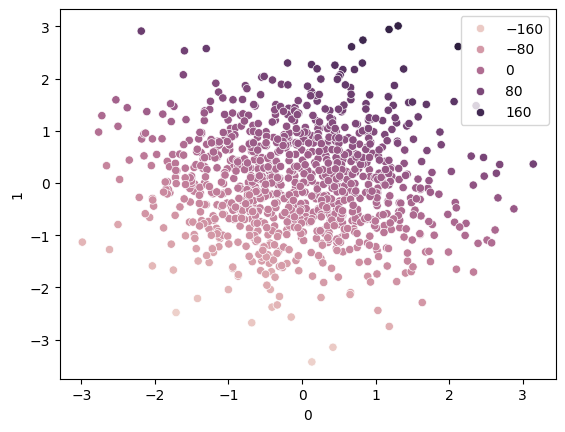

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[22.3698467 , 51.20929534]])

In [14]:
#prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([-1.37155705e+01,  1.19849721e+01,  1.32569711e+01,  7.83828973e+01,
       -7.46767546e+01,  7.46398790e+01, -2.64868143e+01, -3.75665159e+01,
        2.29330700e+01, -4.95897714e+01,  7.76855560e+01,  9.20373069e+01,
        2.50709719e+01, -8.71683862e+01, -1.23032784e+01, -4.61088476e+01,
        1.76913428e+01,  1.28884899e+02,  2.38387001e+01,  1.80883285e+01,
        5.55564226e+01, -9.57021462e+00, -3.22001668e+01, -3.20372421e+01,
       -4.69679988e+01,  3.37047610e+01,  4.53102280e+01, -2.79210361e+01,
       -3.78190789e+01,  7.45850007e+01, -1.97692482e+01,  6.22398327e+01,
       -5.51474447e+00, -7.77612539e+01, -2.44044099e+01,  1.08962592e+01,
        4.20856157e+01,  9.80246146e+00, -4.76515254e+01,  1.58782372e+02,
        9.20564614e+01, -9.16869287e+01, -4.06545060e+01, -4.63660904e+00,
       -8.81907769e+00, -6.93107986e+01,  5.47072843e+01, -3.94654743e+01,
        6.85748656e+01, -5.48025249e+01,  4.24338844e+01,  9.06832996e+01,
       -1.32480184e+01, -

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9966098242227631


### Hyperparameter tuning with SVR

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
            }

In [20]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [21]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.942 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [23]:
#prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9966964036656523
